# Keras API Project Exercise
Subset of data from Kaggle - LendingClub DataSet

Goal: To predict if wheter or not a borrower will pay back.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [8]:
pd.set_option('display.max_colwidth',200)
data_info

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


In [9]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [10]:
def param_info(column_name):
    print(data_info.loc[column_name]['Description'])

In [11]:
param_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [12]:
df = pd.read_csv('lending_club_loan_two.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [14]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


# EDA

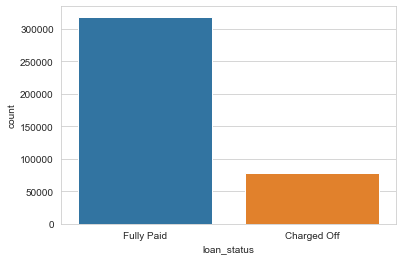

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',data=df)

Text(0.5, 0, 'Amount of Loan')

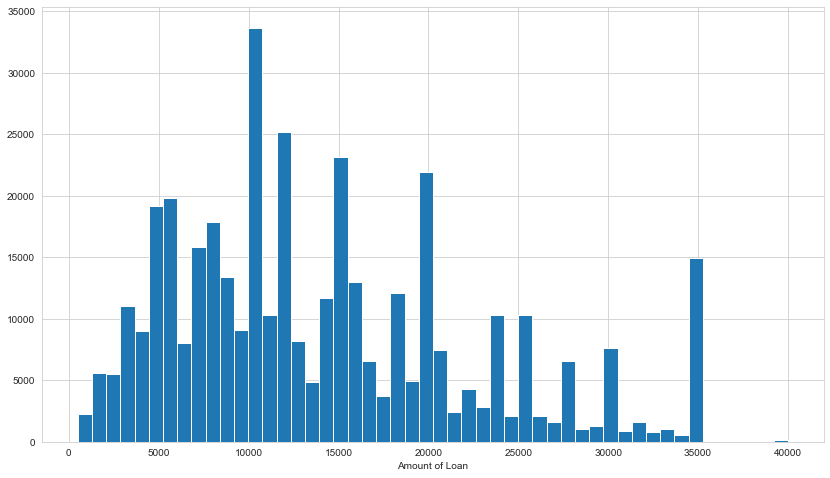

In [19]:
plt.figure(figsize=(14,8))
plt.hist(df['loan_amnt'],bins=50)
plt.xlabel('Amount of Loan')

In [20]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


In [21]:
param_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [22]:
param_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [23]:
param_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [25]:
param_info('dti')

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [27]:
param_info('total_acc')

The total number of credit lines currently in the borrower's credit file


(10, 0)

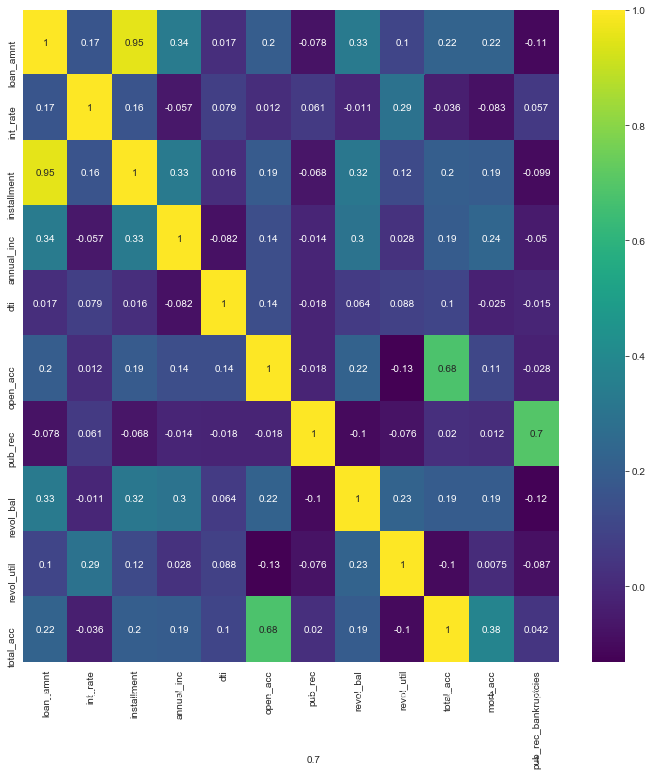

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10,0)

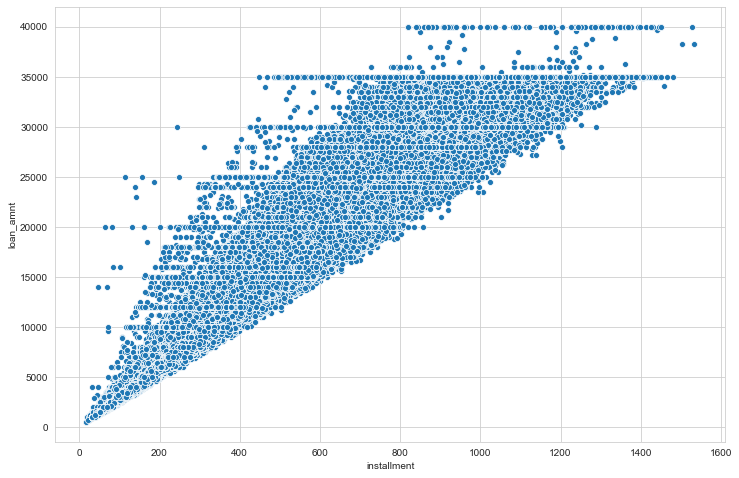

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='installment',y='loan_amnt',data=df)

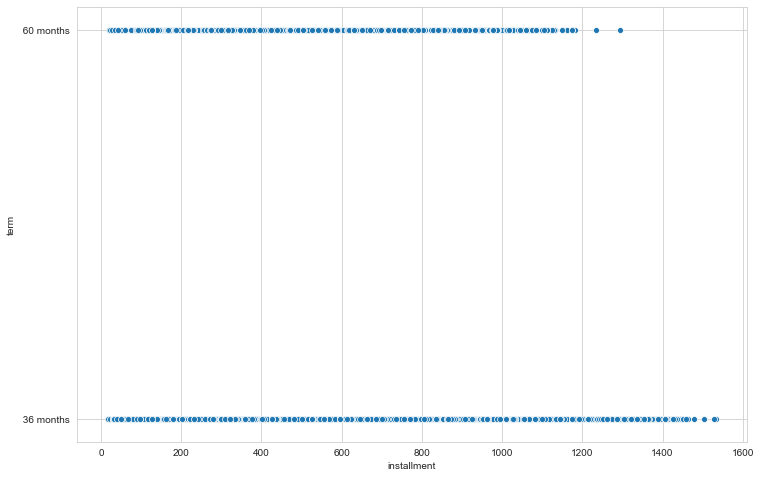

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='installment',y='term',data=df)

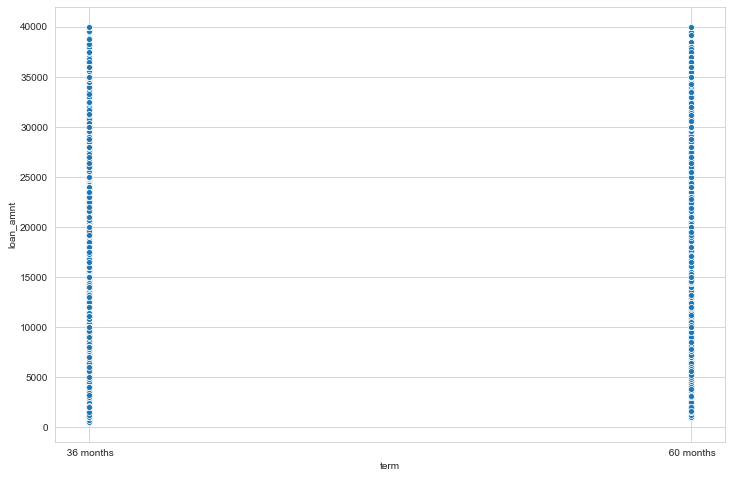

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='term',y='loan_amnt',data=df)

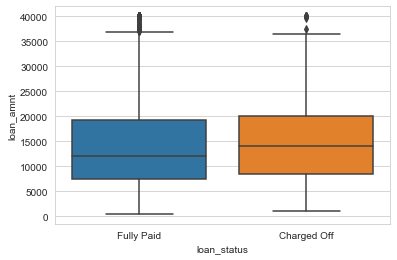

In [34]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [35]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [36]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [37]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


In [38]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [39]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

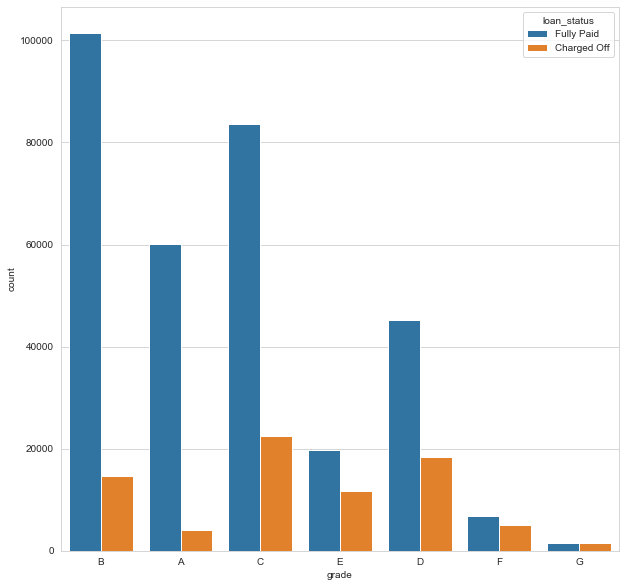

In [41]:
plt.figure(figsize=(10,10))
sns.countplot(df['grade'],hue=df['loan_status'])

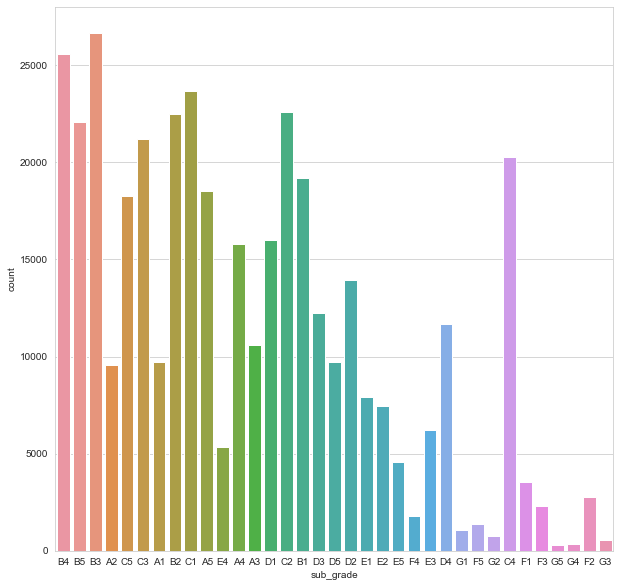

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(df['sub_grade'])

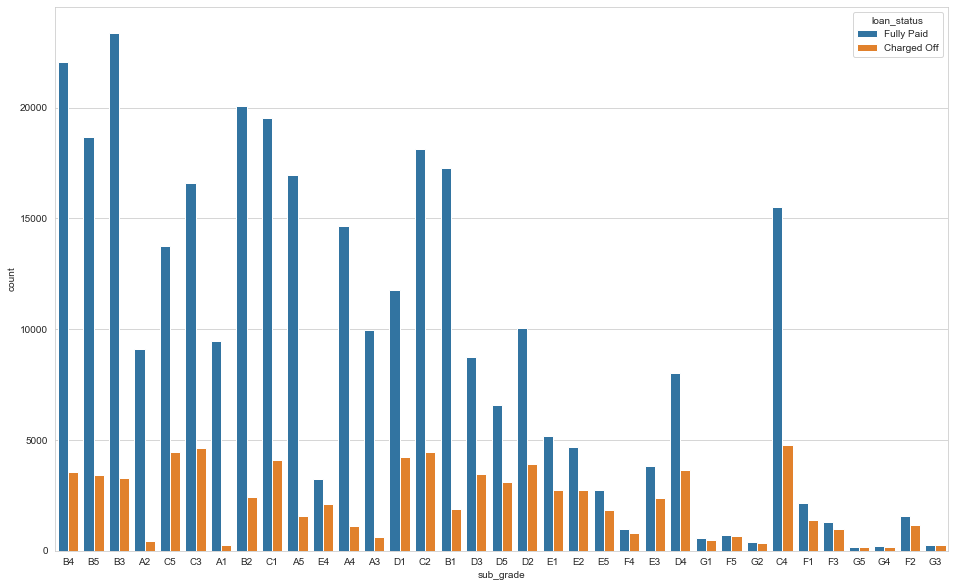

In [44]:
plt.figure(figsize=(16,10))
sns.countplot(df['sub_grade'],hue=df['loan_status'])

In [51]:
f_plus_g = df[(df['grade']=='G') | (df['grade']=='F')]

subgrade_order = sorted(f_plus_g['sub_grade'].unique())

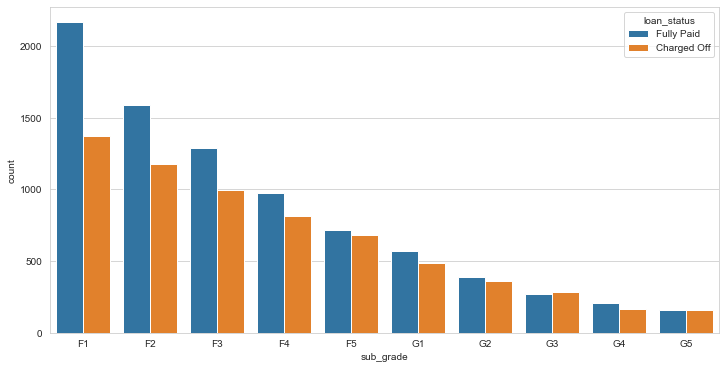

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=f_plus_g,order=subgrade_order,hue='loan_status')

In [59]:
loan_repaid = pd.get_dummies(df['loan_status'],drop_first=True)

In [63]:
df = pd.concat([df,loan_repaid],axis=1)

In [64]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Fully Paid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


In [67]:
df.rename({'Fully Paid':'loan_repaid'},inplace=True,axis=1)

In [68]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1


In [75]:
df._get_numeric_data().corr()['loan_repaid']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

In [80]:
df.corr()['loan_repaid']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

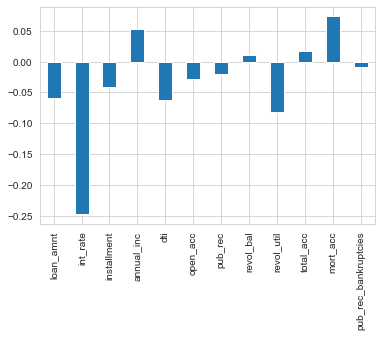

In [78]:
df._get_numeric_data().corr()['loan_repaid'].drop('loan_repaid').plot(kind='bar')

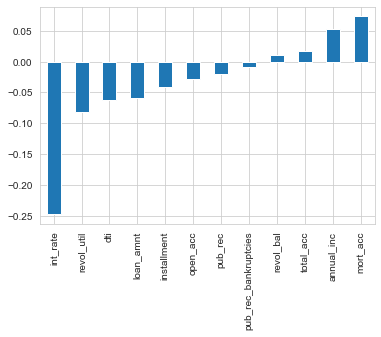

In [79]:
df._get_numeric_data().corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

# Data Preprocessing

In [81]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1


In [82]:
print(len(df))

396030


In [83]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [84]:
100 * df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [85]:
param_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [86]:
param_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [87]:
df['emp_title'].nunique()

173105

In [90]:
df['emp_title'].value_counts()

Teacher               4389
Manager               4250
Registered Nurse      1856
RN                    1846
Supervisor            1830
                      ... 
Post Commander           1
ups                      1
Local Union 3            1
Ultimate Staffing        1
kruger, inc.             1
Name: emp_title, Length: 173105, dtype: int64

In [91]:
df.drop('emp_title',inplace=True,axis=1)

In [92]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1


In [94]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [98]:
emp_length_order = []
emp_length_order.append('< 1 year')
emp_length_order.append('1 year')

for i in range(2,10):
    numero = i
    item = str(i)+' years'
    emp_length_order.append(item)
    
emp_length_order.append('10+ years')
print(emp_length_order)

['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']


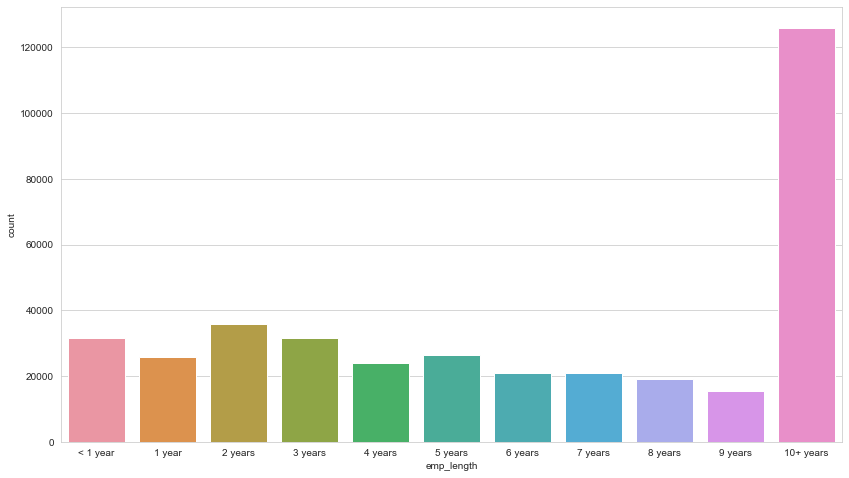

In [101]:
plt.figure(figsize=(14,8))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

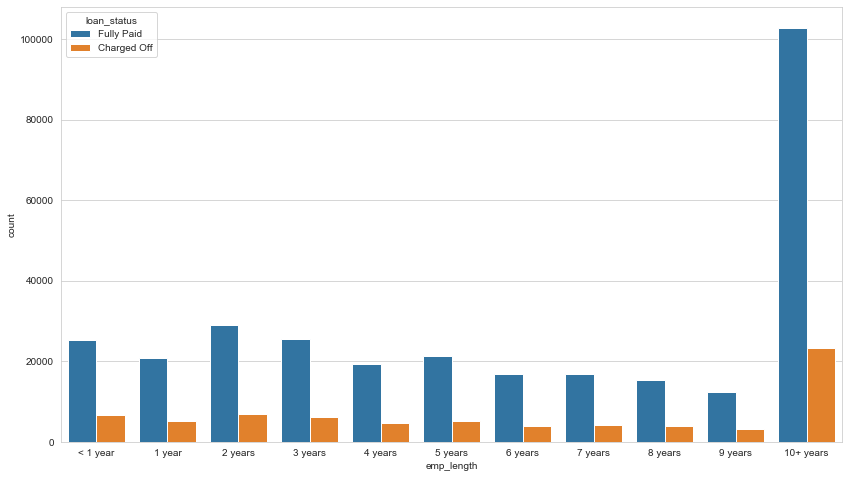

In [102]:
plt.figure(figsize=(14,8))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [107]:
emp_charged = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [110]:
emp_paid = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [111]:
emp_len = emp_charged/emp_paid

In [112]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

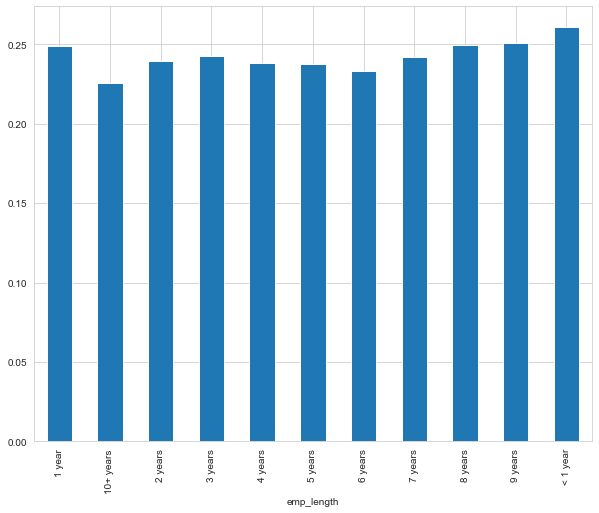

In [114]:
plt.figure(figsize=(10,8))
emp_len.plot(kind='bar')

In [115]:
df.drop('emp_length',axis=1,inplace=True)

In [116]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1


In [118]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [121]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [122]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [123]:
df.drop('title',axis=1,inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396030 entries, 0 to 396029
Data columns (total 25 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-null float64
revol_bal               396030 non-null float64
revol_util              395754 non-null float64
total_acc               396030 non

In [125]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [127]:
param_info('mort_acc')

Number of mortgage accounts.


In [130]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [132]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [133]:
df['total_acc'].head(10)

0    25.0
1    27.0
2    26.0
3    13.0
4    43.0
5    23.0
6    25.0
7    15.0
8    40.0
9    37.0
Name: total_acc, dtype: float64

In [134]:
param_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [135]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [136]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [137]:
def filling_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [139]:
df['mort_acc'] = df.apply(lambda x: filling_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [140]:
df['mort_acc'].head(10)

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
5    4.0
6    3.0
7    0.0
8    3.0
9    1.0
Name: mort_acc, dtype: float64

In [141]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [142]:
df = df.dropna()

In [143]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Categorical Variables and Dummy Variables

In [144]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [145]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [146]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [147]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [148]:
df.drop('grade',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [149]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [150]:
cdf = df.copy()

In [151]:
cdf.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [155]:
subgrade_dummies = pd.get_dummies(data=df['sub_grade'],drop_first=True)

In [156]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [157]:
df.head(3)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [160]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [164]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)
df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1,inplace=True)
df = pd.concat([df,dummies],axis=1)

In [165]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [167]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

In [168]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [169]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [170]:
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [171]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [172]:
df['address'].head(10)

0                 0174 Michelle Gateway\nMendozaberg, OK 22690
1              1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2              87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                        823 Reid Ford\nDelacruzside, MA 00813
4                         679 Luna Roads\nGreggshire, VA 11650
5    1726 Cooper Passage Suite 129\nNorth Deniseberg, DE 30723
6         1008 Erika Vista Suite 748\nEast Stephanie, TX 22690
7                                    USCGC Nunez\nFPO AE 30723
8                                     USCGC Tran\nFPO AP 22690
9                         3390 Luis Rue\nMauricestad, VA 00813
Name: address, dtype: object

In [173]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [174]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [176]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [177]:
param_info('issue_d')

The month which the loan was funded


In [178]:
df.drop('issue_d',axis=1,inplace=True)

In [181]:
param_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [182]:
df['earliest_cr_line'].head(2)

0    Jun-1990
1    Jul-2004
Name: earliest_cr_line, dtype: object

In [184]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))
df.drop('earliest_cr_line',axis=1,inplace=True)

# Train Test Split

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
df = df.drop('loan_status',axis=1)

In [187]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Normalizing the Data

In [189]:
from sklearn.preprocessing import MinMaxScaler

In [190]:
scaler = MinMaxScaler()

In [191]:
X_train = scaler.fit_transform(X_train)

In [192]:
X_test = scaler.transform(X_test)

# Creating the model

In [193]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [195]:
X_train.shape

(316175, 78)

In [197]:
from tensorflow.keras.callbacks import EarlyStopping

In [200]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50)

In [199]:
model = Sequential()

model.add(Dense(78, activation='relu'))

model.add(Dense(39, activation='relu'))

model.add(Dense(19, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam')

In [201]:
model.fit(X_train, y_train, epochs=10000, validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 316175 samples, validate on 79044 samples
Epoch 1/10000
316175/316175 [==============================] - 13s 41us/sample - loss: 0.2699 - val_loss: 0.2641
Epoch 2/10000
316175/316175 [==============================] - 12s 39us/sample - loss: 0.2606 - val_loss: 0.2631
Epoch 3/10000
316175/316175 [==============================] - 12s 39us/sample - loss: 0.2596 - val_loss: 0.2620
Epoch 4/10000
316175/316175 [==============================] - 12s 39us/sample - loss: 0.2587 - val_loss: 0.2617
Epoch 5/10000
316175/316175 [==============================] - 12s 39us/sample - loss: 0.2580 - val_loss: 0.2615
Epoch 6/10000
316175/316175 [==============================] - 12s 39us/sample - loss: 0.2576 - val_loss: 0.2610
Epoch 7/10000
316175/316175 [==============================] - 13s 40us/sample - loss: 0.2572 - val_loss: 0.2611
Epoch 8/10000
316175/316175 [==============================] - 13s 40us/sample - loss: 0.2569 - val_loss: 0.2622
Epoch 9/10000
316175/316175 [================

# Evaluating Model Performace 

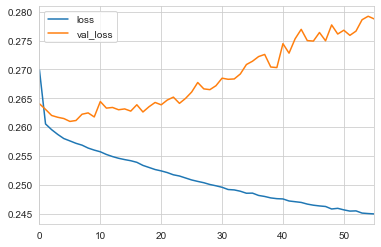

In [202]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# New Model

In [203]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam')

In [204]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [206]:
model.fit(X_train, y_train, epochs=500, batch_size=256, validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 316175 samples, validate on 79044 samples
Epoch 1/500
316175/316175 [==============================] - 4s 12us/sample - loss: 0.3018 - val_loss: 0.2653
Epoch 2/500
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2657 - val_loss: 0.2635
Epoch 3/500
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2632 - val_loss: 0.2621
Epoch 4/500
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2618 - val_loss: 0.2619
Epoch 5/500
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2609 - val_loss: 0.2616
Epoch 6/500
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2604 - val_loss: 0.2621
Epoch 7/500
316175/316175 [==============================] - 3s 11us/sample - loss: 0.2601 - val_loss: 0.2615
Epoch 8/500
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2598 - val_loss: 0.2612
Epoch 9/500
316175/316175 [==============================] - 3s 10us/

# Evaluating Model Performance

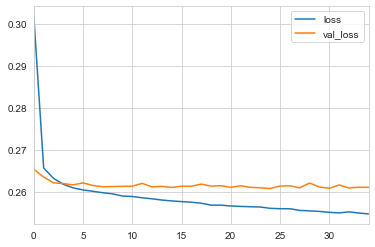

In [207]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Validation

In [212]:
predictions = model.predict_classes(X_test)

In [209]:
from sklearn.metrics import classification_report,confusion_matrix

In [213]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [214]:
confusion_matrix(y_test,predictions)

array([[ 6873,  8785],
       [  124, 63262]], dtype=int64)

In [215]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [216]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

In [217]:
df.iloc[random_ind]['loan_repaid']

1.0